# Test chameleon algorithm

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from visualization import *
#from graphtools import *
from clustertools import *
#from chameleon import *

In [6]:
df = pd.read_csv('./datasets/Aggregation.csv', sep=' ', header=None)

Visualize data and print dataframe header

In [10]:
column_names = list(df.columns.values)
print(column_names)

[0, 1]


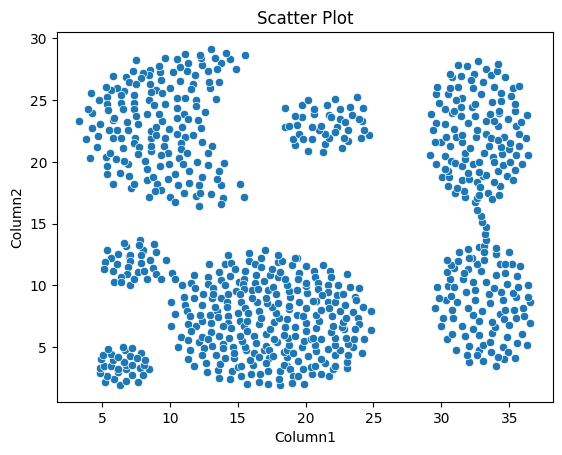

In [13]:
sns.scatterplot(data=df, x=0, y=1)
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.title('Scatter Plot')
plt.show()